# ***HEART DISEASE PREDICTION***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

In [2]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
X=df.drop('target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
y=df.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
clm=X.columns
X=mms.fit_transform(X)
X=pd.DataFrame(X)
X.columns=clm
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [8]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Dependency of features
from sklearn.feature_selection import mutual_info_classif
mic=mutual_info_classif(X,y)
mic = pd.Series(mic)
mic.index = X.columns
mic.sort_values(ascending=False)

cp          0.146672
ca          0.142264
thal        0.127155
exang       0.110698
thalach     0.079319
slope       0.068874
oldpeak     0.068440
chol        0.062141
sex         0.044951
age         0.008441
trestbps    0.000000
fbs         0.000000
restecg     0.000000
dtype: float64

In [10]:
#Corelation of features
df.corr()["target"].abs().sort_values(ascending=False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

### Data Visualization

1    165
0    138
Name: target, dtype: int64


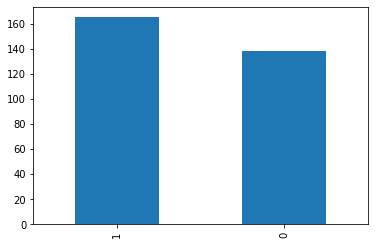

In [11]:
y.value_counts().plot(kind='bar')
print(y.value_counts())
plt.show()

<AxesSubplot:>

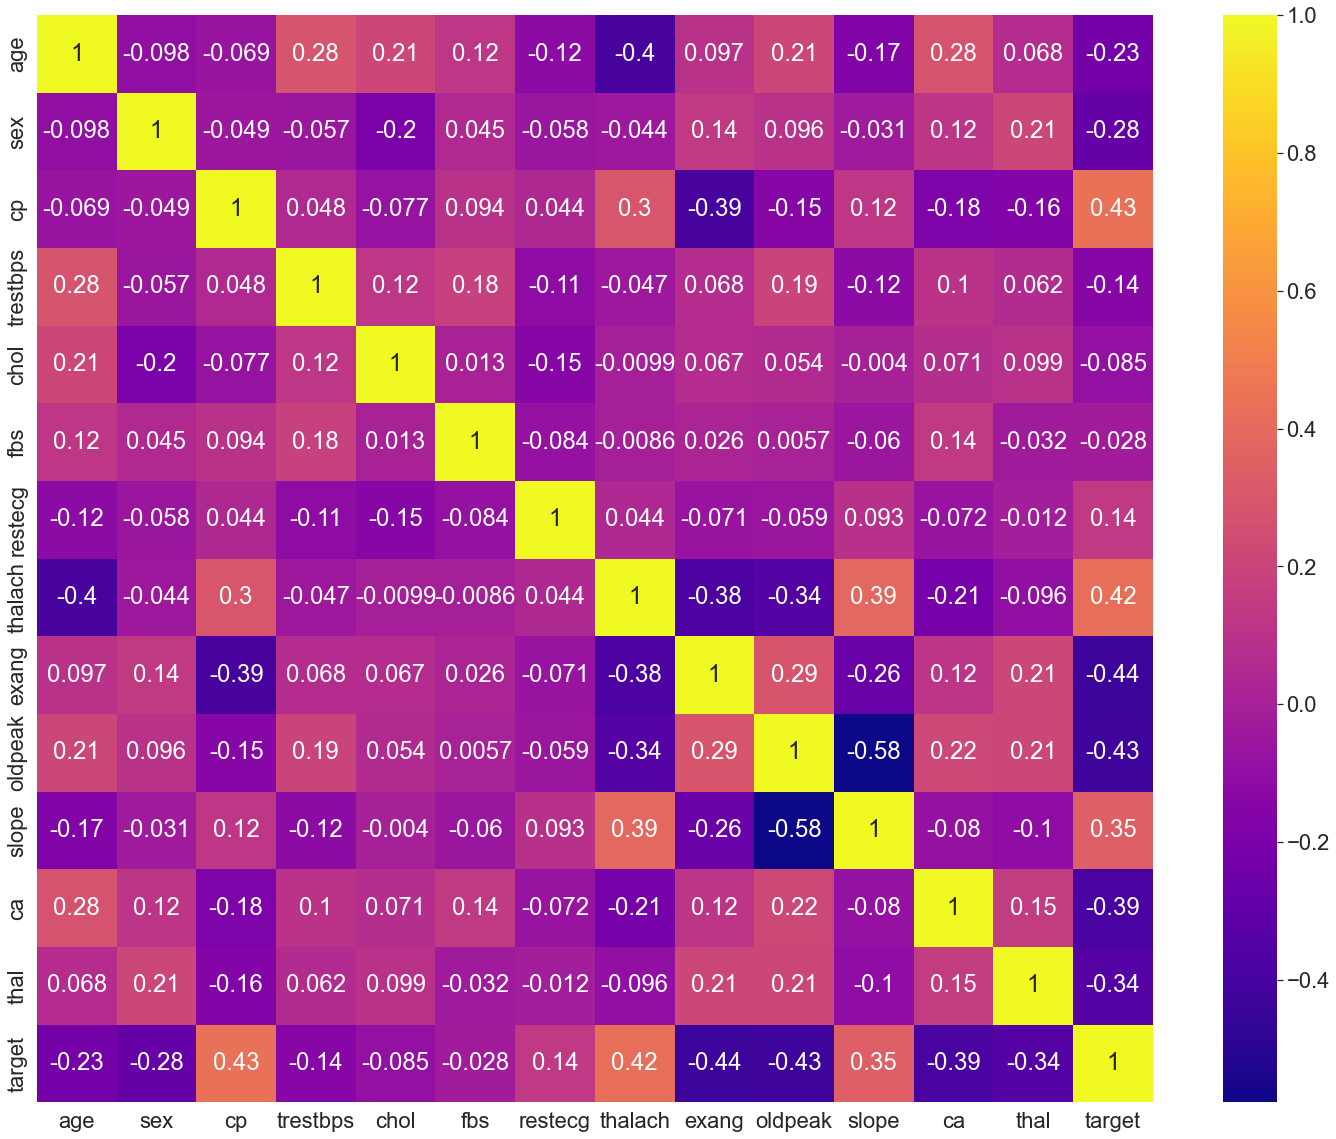

In [12]:
sns.set(font_scale=2)
plt.figure(figsize=(25,20))
sns.heatmap(data=df.corr(),annot=True,cmap='plasma')

<AxesSubplot:>

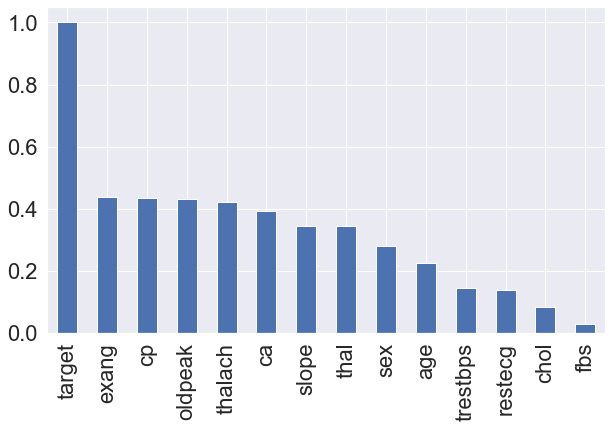

In [13]:
plt.figure(figsize=(10,6))
df.corr()["target"].abs().sort_values(ascending=False).plot(kind='bar')

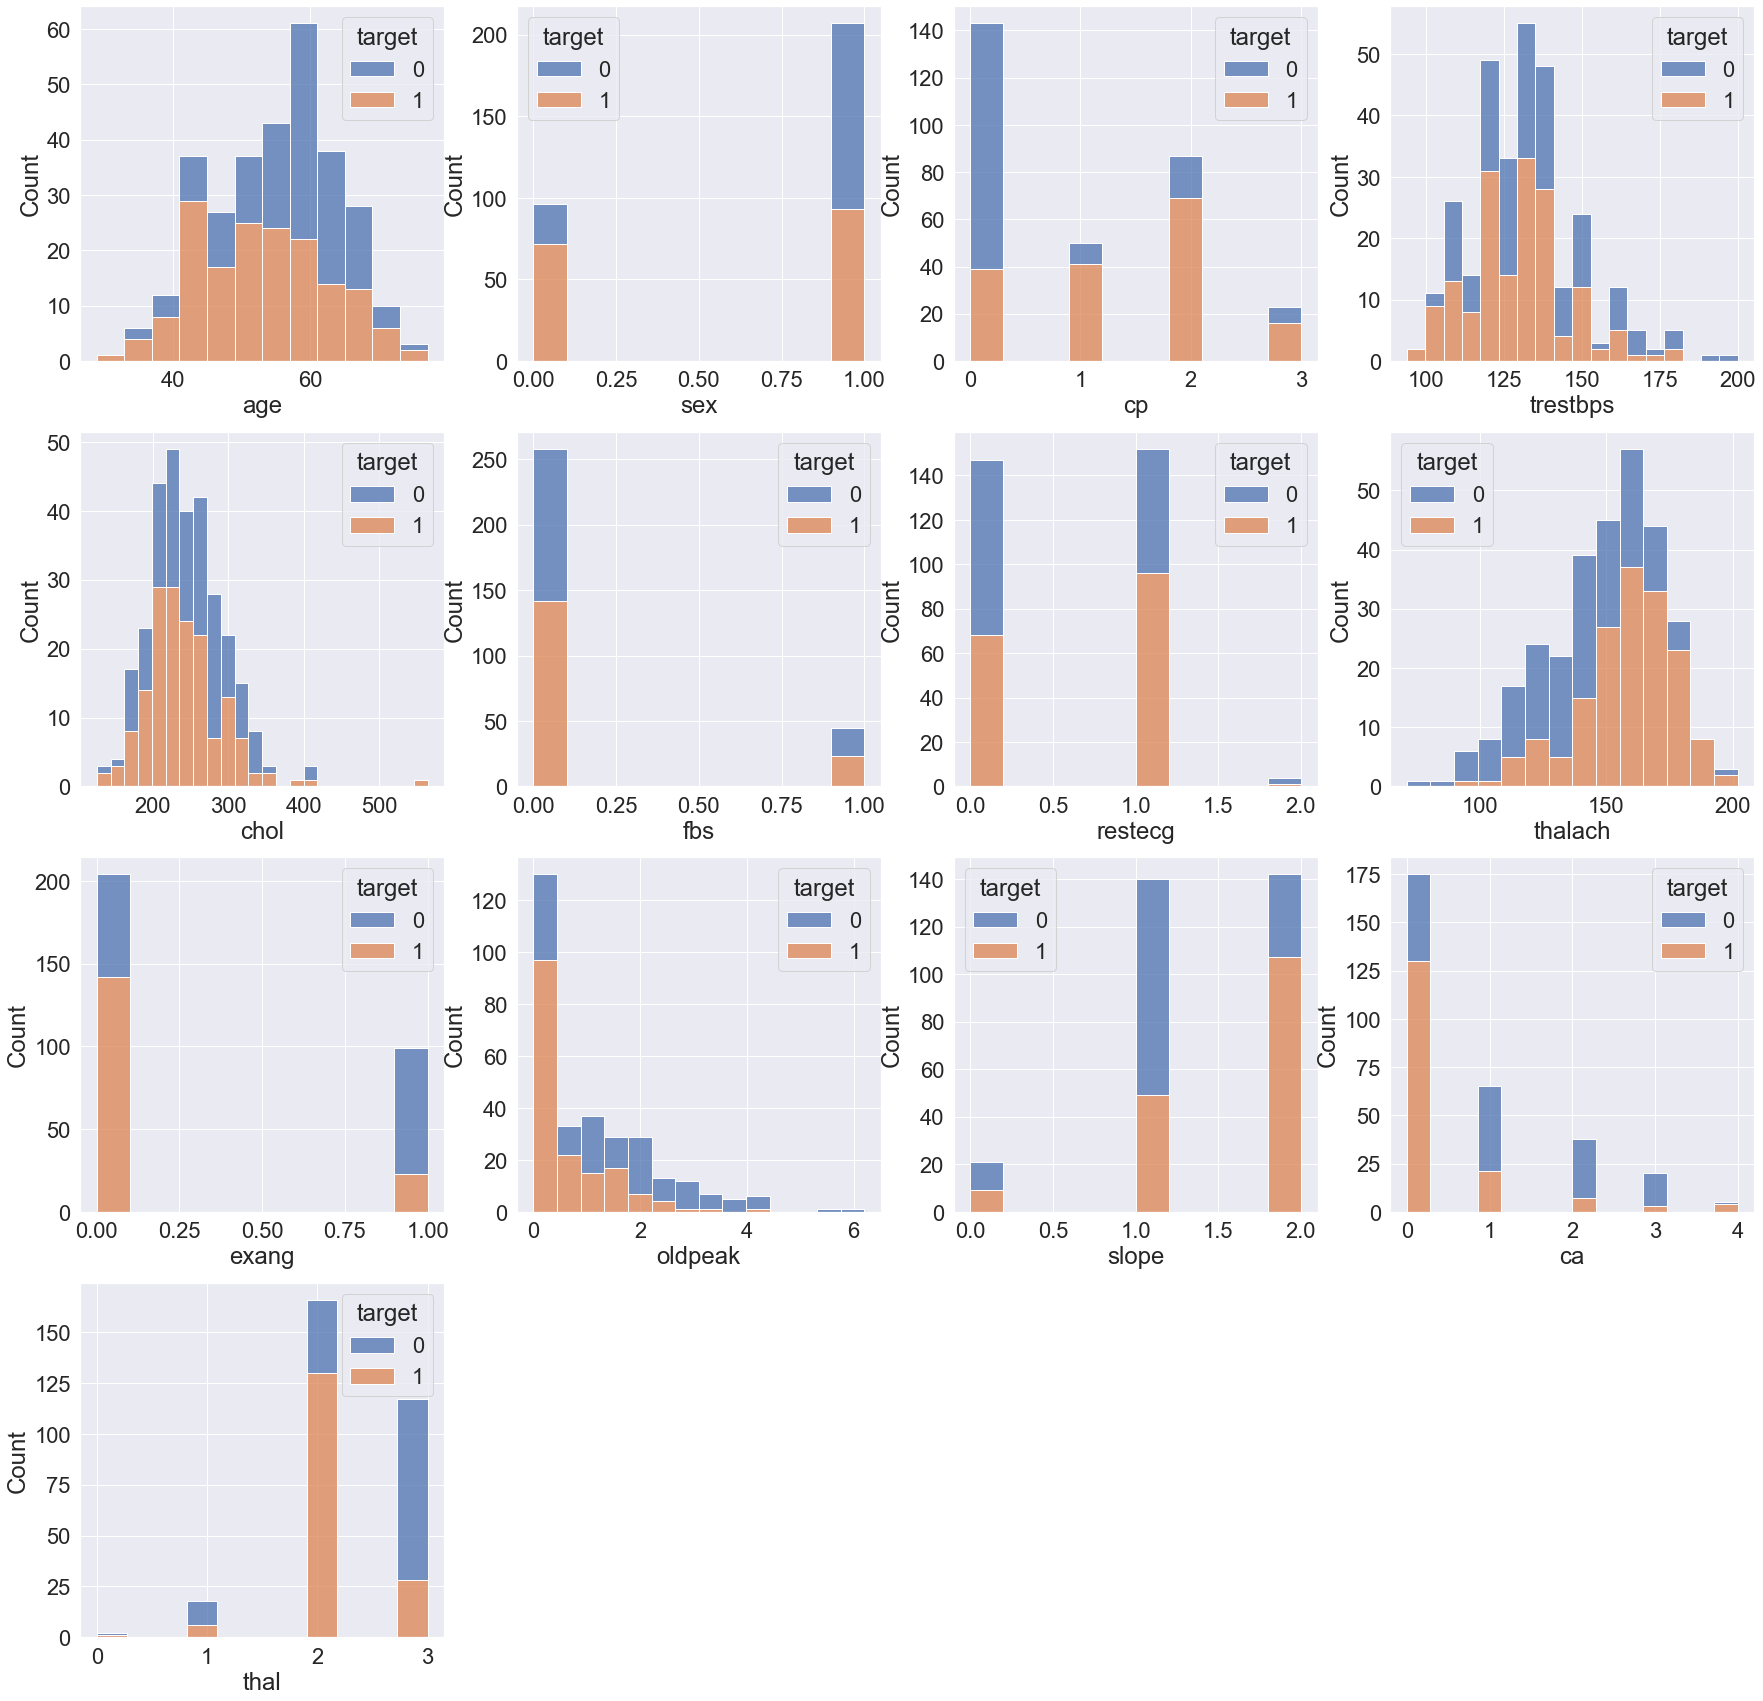

In [14]:
plt.figure(figsize=(30,30))
i=1
for col in X:
    plt.subplot(4,4,i)
    sns.histplot(data=df,x=col,hue=y, multiple="stack")
    i=i+1

### Model Traing and Testing

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=20)

In [16]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [18]:
def res(model):
    model.fit(X_train,y_train)
    print("\nClassifiaction : ",model)
    y_pre=model.predict(X_test)
    print("Accuracy       : ",accuracy_score(y_test,y_pre))
    print("Report         : \n",classification_report(y_test,y_pre))
    print(pd.crosstab(y_test,y_pre))
    print('\n')

In [19]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
lg=LogisticRegression()
grid = {'C': [0.1,10,1000],
       'penalty':['l1', 'l2', 'elasticnet', 'none'],
       'tol':[1e-2,1e-8,],
       'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }
grid_search=GridSearchCV(estimator=lg,param_grid=grid,cv=3)
grid_search.fit(X_train,y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.8386831275720166
Test score: 0.8524590163934426


In [21]:
res1 = pd.DataFrame(grid_search.cv_results_)
res1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000195,0.000276,0.000000,0.000000,0.1,l1,newton-cg,0.01,"{'C': 0.1, 'penalty': 'l1', 'solver': 'newton-...",NaN,NaN,NaN,NaN,NaN,120
1,0.000000,0.000000,0.000000,0.000000,0.1,l1,newton-cg,0.0,"{'C': 0.1, 'penalty': 'l1', 'solver': 'newton-...",NaN,NaN,NaN,NaN,NaN,84
2,0.000000,0.000000,0.000000,0.000000,0.1,l1,lbfgs,0.01,"{'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs',...",NaN,NaN,NaN,NaN,NaN,83
3,0.000646,0.000457,0.000000,0.000000,0.1,l1,lbfgs,0.0,"{'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs',...",NaN,NaN,NaN,NaN,NaN,80
4,0.004333,0.000475,0.003584,0.001145,0.1,l1,liblinear,0.01,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.777778,0.703704,0.7125,0.731327,0.033041,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.000333,0.000471,0.000000,0.000000,1000,none,liblinear,0.0,"{'C': 1000, 'penalty': 'none', 'solver': 'libl...",NaN,NaN,NaN,NaN,NaN,82
116,0.004328,0.000475,0.001681,0.000482,1000,none,sag,0.01,"{'C': 1000, 'penalty': 'none', 'solver': 'sag'...",0.864198,0.839506,0.7625,0.822068,0.043310,21
117,0.008655,0.000468,0.001339,0.000476,1000,none,sag,0.0,"{'C': 1000, 'penalty': 'none', 'solver': 'sag'...",0.864198,0.814815,0.7750,0.818004,0.036485,22
118,0.004971,0.000022,0.001694,0.000454,1000,none,saga,0.01,"{'C': 1000, 'penalty': 'none', 'solver': 'saga...",0.864198,0.827160,0.8000,0.830453,0.026312,13


In [22]:
res1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      120 non-null    float64
 1   std_fit_time       120 non-null    float64
 2   mean_score_time    120 non-null    float64
 3   std_score_time     120 non-null    float64
 4   param_C            120 non-null    object 
 5   param_penalty      120 non-null    object 
 6   param_solver       120 non-null    object 
 7   param_tol          120 non-null    object 
 8   params             120 non-null    object 
 9   split0_test_score  66 non-null     float64
 10  split1_test_score  66 non-null     float64
 11  split2_test_score  66 non-null     float64
 12  mean_test_score    66 non-null     float64
 13  std_test_score     66 non-null     float64
 14  rank_test_score    120 non-null    int32  
dtypes: float64(9), int32(1), object(5)
memory usage: 13.7+ KB


In [23]:
grid_search.best_params_

{'C': 1000, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.01}

In [24]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df2=res1
df3=df2
df3['param_C']=LE.fit_transform(df2['param_C'])
df3['param_penalty']=LE.fit_transform(df2['param_penalty'])
df3['param_solver']=LE.fit_transform(df2['param_solver'])
df3['param_tol']=LE.fit_transform(df2['param_tol'])
df3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000195,0.000276,0.000000,0.000000,0,1,2,1,"{'C': 0.1, 'penalty': 'l1', 'solver': 'newton-...",NaN,NaN,NaN,NaN,NaN,120
1,0.000000,0.000000,0.000000,0.000000,0,1,2,0,"{'C': 0.1, 'penalty': 'l1', 'solver': 'newton-...",NaN,NaN,NaN,NaN,NaN,84
2,0.000000,0.000000,0.000000,0.000000,0,1,0,1,"{'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs',...",NaN,NaN,NaN,NaN,NaN,83
3,0.000646,0.000457,0.000000,0.000000,0,1,0,0,"{'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs',...",NaN,NaN,NaN,NaN,NaN,80
4,0.004333,0.000475,0.003584,0.001145,0,1,1,1,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.777778,0.703704,0.7125,0.731327,0.033041,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.000333,0.000471,0.000000,0.000000,2,3,1,0,"{'C': 1000, 'penalty': 'none', 'solver': 'libl...",NaN,NaN,NaN,NaN,NaN,82
116,0.004328,0.000475,0.001681,0.000482,2,3,3,1,"{'C': 1000, 'penalty': 'none', 'solver': 'sag'...",0.864198,0.839506,0.7625,0.822068,0.043310,21
117,0.008655,0.000468,0.001339,0.000476,2,3,3,0,"{'C': 1000, 'penalty': 'none', 'solver': 'sag'...",0.864198,0.814815,0.7750,0.818004,0.036485,22
118,0.004971,0.000022,0.001694,0.000454,2,3,4,1,"{'C': 1000, 'penalty': 'none', 'solver': 'saga...",0.864198,0.827160,0.8000,0.830453,0.026312,13


In [25]:
cr=df3.corr()

<AxesSubplot:>

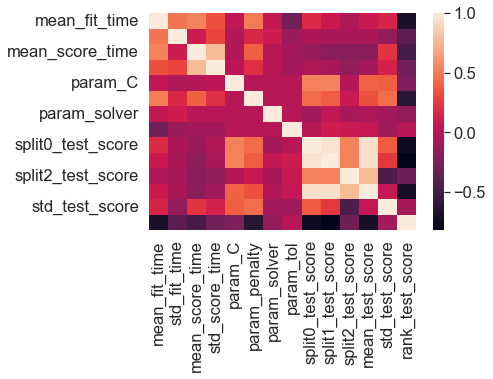

In [76]:
sns.set(font_scale=1.5)
sns.heatmap(cr)

In [27]:
cr["mean_test_score"].abs().sort_values(ascending=False)

mean_test_score      1.000000
split1_test_score    0.940241
split0_test_score    0.939002
split2_test_score    0.766875
rank_test_score      0.719929
param_C              0.399696
param_penalty        0.336630
mean_score_time      0.195552
std_score_time       0.088389
mean_fit_time        0.085641
param_tol            0.067000
std_test_score       0.066488
std_fit_time         0.060706
param_solver         0.035219
Name: mean_test_score, dtype: float64

Text(0, 0.5, 'Cross-Validated Accuracy')

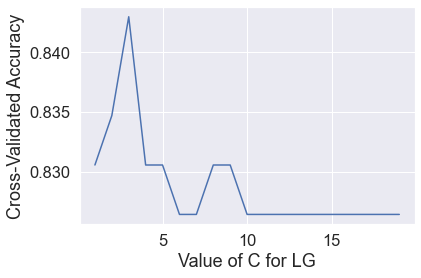

In [75]:
k_range = range(1, 20)
k_scores = []
for k in k_range:
    model = LogisticRegression(C=k)
    scores = cross_val_score(model, X_train, y_train, cv=2, scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of C for LG')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Accuracy')

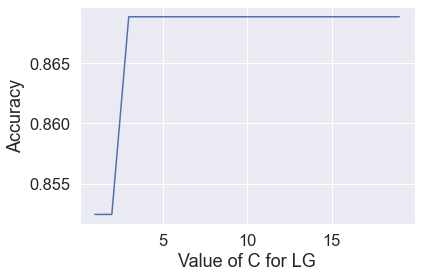

In [74]:
k_range = range(1, 20)
scores = []
for k in k_range:
    model = LogisticRegression(C=k)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pre))
plt.plot(k_range, scores)
plt.xlabel('Value of C for LG')
plt.ylabel('Accuracy')

In [101]:
def acc(model):
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    return accuracy_score(y_test,y_pre)

In [102]:
LGs=acc(LogisticRegression(C=2.5))
LGs

0.8688524590163934

In [30]:
res(LogisticRegression(C=2.5))


Classifiaction :  LogisticRegression(C=2.5)
Accuracy       :  0.8688524590163934
Report         : 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

col_0    0   1
target        
0       23   5
1        3  30




In [31]:
rf=RandomForestClassifier()
grid = {
    'max_depth': [100,500],
    'max_features':['auto', 'sqrt', 'log2'],
    'min_samples_leaf':[1, 2,8],
    'min_samples_split': [2, 5, 14],    
    'n_estimators': [100,300,500]
}
grid_search=GridSearchCV(estimator=rf,param_grid=grid,cv=2)
grid_search.fit(X_train,y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.859504132231405
Test score: 0.8688524590163934


In [32]:
res2= pd.DataFrame(grid_search.cv_results_)
res2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.200983,0.014983,0.017489,0.000499,100,auto,1,2,100,"{'max_depth': 100, 'max_features': 'auto', 'mi...",0.851240,0.793388,0.822314,0.028926,136
1,0.669028,0.133665,0.048441,0.001563,100,auto,1,2,300,"{'max_depth': 100, 'max_features': 'auto', 'mi...",0.834711,0.851240,0.842975,0.008264,28
2,1.017214,0.157859,0.082148,0.004018,100,auto,1,2,500,"{'max_depth': 100, 'max_features': 'auto', 'mi...",0.826446,0.801653,0.814050,0.012397,152
3,0.195061,0.010291,0.023330,0.004170,100,auto,1,5,100,"{'max_depth': 100, 'max_features': 'auto', 'mi...",0.859504,0.801653,0.830579,0.028926,89
4,0.748113,0.002549,0.043184,0.009167,100,auto,1,5,300,"{'max_depth': 100, 'max_features': 'auto', 'mi...",0.842975,0.809917,0.826446,0.016529,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.564326,0.017336,0.050765,0.007777,500,log2,8,5,300,"{'max_depth': 500, 'max_features': 'log2', 'mi...",0.859504,0.851240,0.855372,0.004132,2
158,0.967573,0.037090,0.077805,0.002906,500,log2,8,5,500,"{'max_depth': 500, 'max_features': 'log2', 'mi...",0.867769,0.851240,0.859504,0.008264,1
159,0.197092,0.003972,0.020553,0.002167,500,log2,8,14,100,"{'max_depth': 500, 'max_features': 'log2', 'mi...",0.867769,0.818182,0.842975,0.024793,28
160,0.612039,0.039555,0.054340,0.012361,500,log2,8,14,300,"{'max_depth': 500, 'max_features': 'log2', 'mi...",0.859504,0.842975,0.851240,0.008264,8


In [33]:
grid_search.best_params_

{'max_depth': 500,
 'max_features': 'log2',
 'min_samples_leaf': 8,
 'min_samples_split': 5,
 'n_estimators': 500}

In [34]:
res(RandomForestClassifier(max_depth= 100,
 max_features= 'sqrt',
 min_samples_leaf= 8,
 min_samples_split= 12,
 n_estimators= 500))


Classifiaction :  RandomForestClassifier(max_depth=100, min_samples_leaf=8, min_samples_split=12,
                       n_estimators=500)
Accuracy       :  0.8524590163934426
Report         : 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

col_0    0   1
target        
0       22   6
1        3  30




In [35]:
res2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            162 non-null    float64
 1   std_fit_time             162 non-null    float64
 2   mean_score_time          162 non-null    float64
 3   std_score_time           162 non-null    float64
 4   param_max_depth          162 non-null    object 
 5   param_max_features       162 non-null    object 
 6   param_min_samples_leaf   162 non-null    object 
 7   param_min_samples_split  162 non-null    object 
 8   param_n_estimators       162 non-null    object 
 9   params                   162 non-null    object 
 10  split0_test_score        162 non-null    float64
 11  split1_test_score        162 non-null    float64
 12  mean_test_score          162 non-null    float64
 13  std_test_score           162 non-null    float64
 14  rank_test_score          1

In [36]:
df2=res2
df3=df2
df3['param_max_depth']=LE.fit_transform(df2['param_max_depth'])
df3['param_max_features']=LE.fit_transform(df2['param_max_features'])
df3['param_min_samples_leaf']=LE.fit_transform(df2['param_min_samples_leaf'])
df3['param_min_samples_split']=LE.fit_transform(df2['param_min_samples_split'])
df3['param_n_estimators']=LE.fit_transform(df2['param_n_estimators'])
df3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.200983,0.014983,0.017489,0.000499,0,0,0,0,0,"{'max_depth': 100, 'max_features': 'auto', 'mi...",0.851240,0.793388,0.822314,0.028926,136
1,0.669028,0.133665,0.048441,0.001563,0,0,0,0,1,"{'max_depth': 100, 'max_features': 'auto', 'mi...",0.834711,0.851240,0.842975,0.008264,28
2,1.017214,0.157859,0.082148,0.004018,0,0,0,0,2,"{'max_depth': 100, 'max_features': 'auto', 'mi...",0.826446,0.801653,0.814050,0.012397,152
3,0.195061,0.010291,0.023330,0.004170,0,0,0,1,0,"{'max_depth': 100, 'max_features': 'auto', 'mi...",0.859504,0.801653,0.830579,0.028926,89
4,0.748113,0.002549,0.043184,0.009167,0,0,0,1,1,"{'max_depth': 100, 'max_features': 'auto', 'mi...",0.842975,0.809917,0.826446,0.016529,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.564326,0.017336,0.050765,0.007777,1,1,2,1,1,"{'max_depth': 500, 'max_features': 'log2', 'mi...",0.859504,0.851240,0.855372,0.004132,2
158,0.967573,0.037090,0.077805,0.002906,1,1,2,1,2,"{'max_depth': 500, 'max_features': 'log2', 'mi...",0.867769,0.851240,0.859504,0.008264,1
159,0.197092,0.003972,0.020553,0.002167,1,1,2,2,0,"{'max_depth': 500, 'max_features': 'log2', 'mi...",0.867769,0.818182,0.842975,0.024793,28
160,0.612039,0.039555,0.054340,0.012361,1,1,2,2,1,"{'max_depth': 500, 'max_features': 'log2', 'mi...",0.859504,0.842975,0.851240,0.008264,8


In [37]:
df3.corr()["mean_test_score"].abs().sort_values(ascending=False)

mean_test_score            1.000000
rank_test_score            0.972363
split1_test_score          0.804250
split0_test_score          0.744771
param_min_samples_leaf     0.627471
param_min_samples_split    0.240484
std_test_score             0.201107
param_n_estimators         0.152030
mean_fit_time              0.140541
mean_score_time            0.128948
param_max_depth            0.094792
std_score_time             0.080060
std_fit_time               0.022970
param_max_features         0.013821
Name: mean_test_score, dtype: float64

Text(0, 0.5, 'Cross-Validated Accuracy')

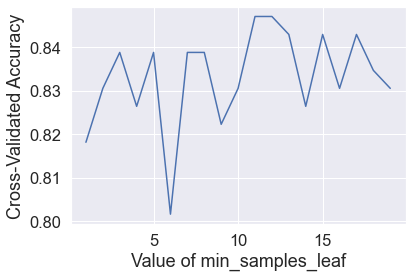

In [77]:
k_range = range(1, 20)
k_scores = []
for k in k_range:
    model = RandomForestClassifier(min_samples_leaf=k)
    scores = cross_val_score(model, X_train, y_train, cv=2, scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of min_samples_leaf')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Accuracy')

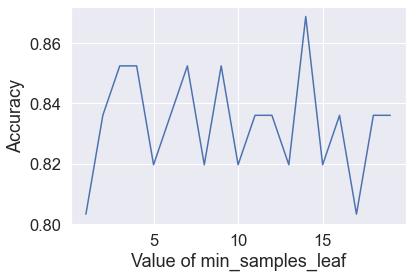

In [85]:
k_range = range(1, 20)
scores = []
for k in k_range:
    model = RandomForestClassifier(min_samples_leaf=k)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pre))
plt.plot(k_range, scores)
plt.xlabel('Value of min_samples_leaf')
plt.ylabel('Accuracy')

In [89]:
res(RandomForestClassifier(min_samples_leaf=12))


Classifiaction :  RandomForestClassifier(min_samples_leaf=12)
Accuracy       :  0.8524590163934426
Report         : 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

col_0    0   1
target        
0       22   6
1        3  30




In [91]:
k_range = np.linspace(start=0,stop=2000,num=2001,dtype='int') 
scores = []
for k in k_range:
    model = RandomForestClassifier(random_state=k)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pre))

Text(0, 0.5, 'Accuracy')

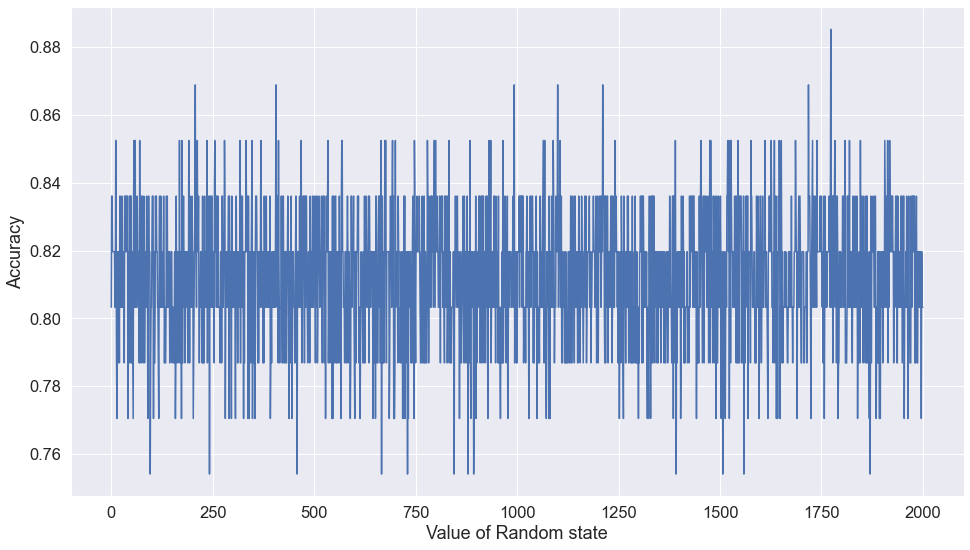

In [92]:
plt.figure(figsize=(16,9))
plt.plot(k_range, scores)
plt.xlabel('Value of Random state')
plt.ylabel('Accuracy')

In [103]:
RFs=acc(RandomForestClassifier(random_state=1773))
RFs

0.8852459016393442

In [44]:
res(RandomForestClassifier(random_state=1773))


Classifiaction :  RandomForestClassifier(random_state=1773)
Accuracy       :  0.8852459016393442
Report         : 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

col_0    0   1
target        
0       24   4
1        3  30




In [45]:
res(GaussianNB())


Classifiaction :  GaussianNB()
Accuracy       :  0.8524590163934426
Report         : 
               precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.82      0.94      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61

col_0    0   1
target        
0       21   7
1        2  31




In [104]:
GNBs=acc(GaussianNB())
GNBs

0.8524590163934426

Text(0, 0.5, 'Accuracy')

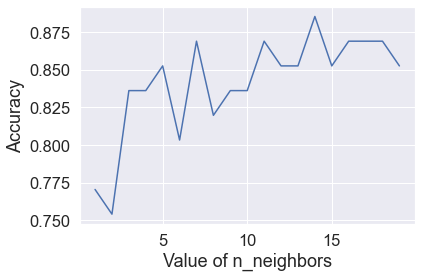

In [72]:
k_range = range(1, 20)
scores = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pre))
plt.plot(k_range, scores)
plt.xlabel('Value of n_neighbors')
plt.ylabel('Accuracy')

In [47]:
res(KNeighborsClassifier(14))


Classifiaction :  KNeighborsClassifier(n_neighbors=14)
Accuracy       :  0.8852459016393442
Report         : 
               precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

col_0    0   1
target        
0       23   5
1        2  31




In [106]:
KNNs=(acc(KNeighborsClassifier(14)))
KNNs

0.8852459016393442

In [48]:
grid = {'C': [0.1,0.5,0.63, 1, 10,], 
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf','linear']} 
grid_search=GridSearchCV(estimator=SVC(),param_grid=grid,cv=3)
grid_search.fit(X_train,y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
res4= pd.DataFrame(grid_search.cv_results_)
res4

Cross-validation score: 0.834619341563786
Test score: 0.819672131147541


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004108,0.002952,0.004787,0.004671,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.716049,0.740741,0.7750,0.743930,0.024172,35
1,0.004674,0.002506,0.001536,0.001095,0.1,1,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.827160,0.777778,0.8125,0.805813,0.020708,23
2,0.006124,0.001363,0.001142,0.000982,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.604938,0.629630,0.6750,0.636523,0.029015,38
3,0.002475,0.001764,0.003618,0.002922,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.827160,0.777778,0.8125,0.805813,0.020708,23
4,0.002332,0.001700,0.001422,0.001030,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.543210,0.543210,0.5500,0.545473,0.003201,39
5,0.008015,0.001060,0.000000,0.000000,0.1,0.01,linear,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",0.827160,0.777778,0.8125,0.805813,0.020708,23
6,0.007531,0.000650,0.003144,0.002235,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.543210,0.543210,0.5500,0.545473,0.003201,39
7,0.002263,0.001963,0.003364,0.003439,0.1,0.001,linear,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}",0.827160,0.777778,0.8125,0.805813,0.020708,23
8,0.001322,0.001870,0.005364,0.003794,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.543210,0.543210,0.5500,0.545473,0.003201,39
9,0.006766,0.001799,0.001210,0.001711,0.1,0.0001,linear,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}",0.827160,0.777778,0.8125,0.805813,0.020708,23


In [49]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Text(0, 0.5, 'Accuracy')

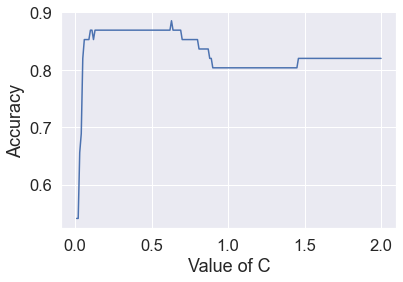

In [71]:
k_range = np.linspace(start=0.01,stop=2,num=200) 
scores = []
for k in k_range:
    model = SVC(C=k)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pre))
plt.plot(k_range, scores)
plt.xlabel('Value of C')
plt.ylabel('Accuracy')

In [51]:
res(SVC(C=0.63))


Classifiaction :  SVC(C=0.63)
Accuracy       :  0.8852459016393442
Report         : 
               precision    recall  f1-score   support

           0       0.96      0.79      0.86        28
           1       0.84      0.97      0.90        33

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

col_0    0   1
target        
0       22   6
1        1  32




In [107]:
SVCs=acc(SVC(C=0.63))
SVCs

0.8852459016393442

In [52]:
dt=DecisionTreeClassifier()
grid = {'criterion' : ['gini', 'entropy'],
        'max_depth' : [2,4,6,8,10,12],
        'min_samples_split':[0.1,0.2]} 
grid_search=GridSearchCV(estimator=dt,param_grid=grid,cv=3)
grid_search.fit(X_train,y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
res5= pd.DataFrame(grid_search.cv_results_)
res5

Cross-validation score: 0.7932613168724281
Test score: 0.819672131147541


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005478,0.003875,0.002681,0.002081,gini,2,0.1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.802469,0.777778,0.7375,0.772582,0.026777,8
1,0.002681,0.003792,0.002904,0.004107,gini,2,0.2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.802469,0.777778,0.7375,0.772582,0.026777,8
2,0.005371,0.003799,0.000000,0.000000,gini,4,0.1,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.790123,0.753086,0.7750,0.772737,0.015205,6
3,0.002665,0.003769,0.002673,0.003780,gini,4,0.2,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.777778,0.777778,0.7375,0.764352,0.018987,13
4,0.002667,0.003772,0.002672,0.003779,gini,6,0.1,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.777778,0.753086,0.7250,0.751955,0.021561,24
5,0.002670,0.003777,0.002667,0.003771,gini,6,0.2,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.777778,0.777778,0.7375,0.764352,0.018987,13
6,0.002664,0.003768,0.002631,0.003720,gini,8,0.1,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.777778,0.765432,0.7625,0.768570,0.006620,12
7,0.002667,0.003771,0.002667,0.003772,gini,8,0.2,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.777778,0.777778,0.7375,0.764352,0.018987,13
8,0.002668,0.003773,0.000000,0.000000,gini,10,0.1,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.777778,0.765432,0.7250,0.756070,0.022540,23
9,0.000000,0.000000,0.002665,0.003769,gini,10,0.2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.777778,0.777778,0.7375,0.764352,0.018987,13


Text(0, 0.5, 'Accuracy')

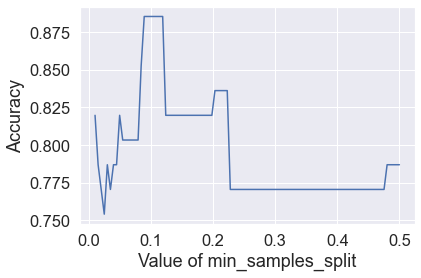

In [70]:
k_range = np.linspace(start=0.01,stop=0.5,num=100)
scores = []
for k in k_range:
    model = DecisionTreeClassifier(min_samples_split=k)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pre))
plt.plot(k_range, scores)
plt.xlabel('Value of min_samples_split')
plt.ylabel('Accuracy')

In [54]:
res(DecisionTreeClassifier(min_samples_split=0.1))


Classifiaction :  DecisionTreeClassifier(min_samples_split=0.1)
Accuracy       :  0.8852459016393442
Report         : 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

col_0    0   1
target        
0       24   4
1        3  30




In [109]:
DTs=acc(DecisionTreeClassifier(min_samples_split=0.1))
DTs

0.8852459016393442

In [55]:
gb=GradientBoostingClassifier()
grid = {"n_estimators":[5,50,100],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10]} 
grid_search=GridSearchCV(estimator=gb,param_grid=grid,cv=3)
grid_search.fit(X_train,y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')
res6= pd.DataFrame(grid_search.cv_results_)
res6

Cross-validation score: 0.8469650205761318
Test score: 0.8360655737704918


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005745,0.004861,0.000658,0.000931,0.01,1,5,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",0.543210,0.543210,0.5500,0.545473,0.003201,53
1,0.022610,0.010703,0.004191,0.003814,0.01,1,50,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",0.814815,0.777778,0.7375,0.776698,0.031573,37
2,0.063519,0.005335,0.005114,0.003630,0.01,1,100,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",0.876543,0.814815,0.7750,0.822119,0.041775,5
3,0.008005,0.000009,0.000000,0.000000,0.01,3,5,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.543210,0.543210,0.5500,0.545473,0.003201,53
4,0.067555,0.021899,0.002665,0.003768,0.01,3,50,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.839506,0.839506,0.7625,0.813837,0.036301,6
5,0.127836,0.007466,0.000974,0.001378,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.864198,0.839506,0.7750,0.826235,0.037605,4
6,0.013398,0.001710,0.002330,0.000474,0.01,5,5,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.543210,0.543210,0.5500,0.545473,0.003201,53
7,0.100943,0.004989,0.000999,0.001413,0.01,5,50,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.851852,0.740741,0.7875,0.793364,0.045550,17
8,0.238538,0.038793,0.001032,0.001459,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.802469,0.765432,0.7500,0.772634,0.022017,40
9,0.014993,0.007676,0.002076,0.001794,0.01,7,5,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.543210,0.543210,0.5500,0.545473,0.003201,53


Text(0, 0.5, 'Accuracy')

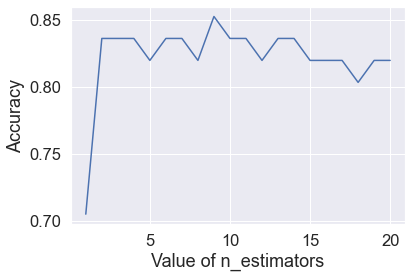

In [69]:
k_range = np.linspace(start=1,stop=20,num=20,dtype='int') 
scores = []
for k in k_range:
    model = GradientBoostingClassifier(n_estimators=k)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pre))
plt.plot(k_range, scores)
plt.xlabel('Value of n_estimators')
plt.ylabel('Accuracy')

In [57]:
res(GradientBoostingClassifier(n_estimators=9))


Classifiaction :  GradientBoostingClassifier(n_estimators=9)
Accuracy       :  0.8524590163934426
Report         : 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

col_0    0   1
target        
0       22   6
1        3  30




In [111]:
GBs=acc(GradientBoostingClassifier(n_estimators=9))
GBs

0.8524590163934426

Text(0, 0.5, 'Accuracy')

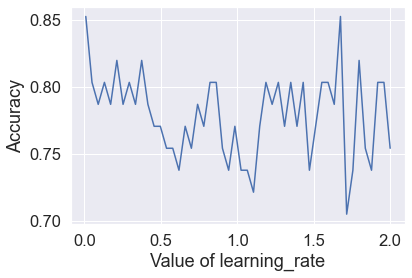

In [68]:
k_range = np.linspace(start=0.01,stop=2,num=50) 
scores = []
for k in k_range:
    model = GradientBoostingClassifier(learning_rate=k)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pre))
plt.plot(k_range, scores)
plt.xlabel('Value of learning_rate')
plt.ylabel('Accuracy')

In [134]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(20, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test))

Epoch 1/25
8/8 [==============================] - 0s 15ms/step - loss: 2.6989 - accuracy: 0.4256 - val_loss: 2.5670 - val_accuracy: 0.4590
Epoch 2/25
8/8 [==============================] - 0s 5ms/step - loss: 2.4862 - accuracy: 0.4463 - val_loss: 2.3466 - val_accuracy: 0.4590
Epoch 3/25
8/8 [==============================] - 0s 6ms/step - loss: 2.2708 - accuracy: 0.4545 - val_loss: 2.1215 - val_accuracy: 0.4590
Epoch 4/25
8/8 [==============================] - 0s 6ms/step - loss: 2.0519 - accuracy: 0.4545 - val_loss: 1.8942 - val_accuracy: 0.4590
Epoch 5/25
8/8 [==============================] - 0s 6ms/step - loss: 1.8335 - accuracy: 0.4545 - val_loss: 1.6702 - val_accuracy: 0.4590
Epoch 6/25
8/8 [==============================] - 0s 5ms/step - loss: 1.6204 - accuracy: 0.4545 - val_loss: 1.4583 - val_accuracy: 0.4590
Epoch 7/25
8/8 [==============================] - 0s 6ms/step - loss: 1.4211 - accuracy: 0.4545 - val_loss: 1.2665 - val_accuracy: 0.4590
Epoch 8/25
8/8 [=================

In [135]:
NNs=model.evaluate(X_test,y_test)
NNs

2/2 [==============================] - 0s 5ms/step - loss: 0.3933 - accuracy: 0.8852


[0.3933221101760864, 0.8852459192276001]

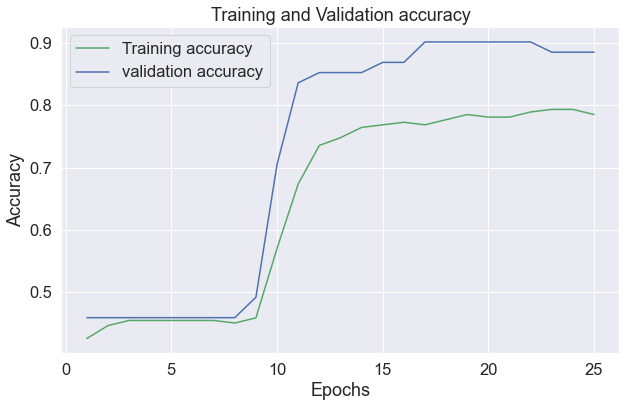

In [136]:
sns.set(font_scale=1.5)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(10,6))
epochs = range(1,len(train_acc)+1)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc , 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [131]:
import tensorflow as tf
mode = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
	keras.layers.Dense(16, activation='softmax'),
    keras.layers.Dense(1, activation='sigmoid'),
])

mode.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist=mode.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 16ms/step - loss: 0.6974 - accuracy: 0.4545 - val_loss: 0.6950 - val_accuracy: 0.4590
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6952 - accuracy: 0.4545 - val_loss: 0.6928 - val_accuracy: 0.4590
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.4545 - val_loss: 0.6903 - val_accuracy: 0.4590
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6913 - accuracy: 0.4587 - val_loss: 0.6876 - val_accuracy: 0.4426
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6888 - accuracy: 0.5413 - val_loss: 0.6847 - val_accuracy: 0.7377
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6864 - accuracy: 0.6653 - val_loss: 0.6815 - val_accuracy: 0.8033
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6836 - accuracy: 0.7479 - val_loss: 0.6779 - val_accuracy: 0.8033
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 9ms/step - loss: 0.4683 - accuracy: 0.8512 - val_loss: 0.4402 - val_accuracy: 0.8525
Epoch 60/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4662 - accuracy: 0.8471 - val_loss: 0.4362 - val_accuracy: 0.8525
Epoch 61/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4645 - accuracy: 0.8471 - val_loss: 0.4360 - val_accuracy: 0.8525
Epoch 62/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4621 - accuracy: 0.8512 - val_loss: 0.4326 - val_accuracy: 0.8525
Epoch 63/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4604 - accuracy: 0.8471 - val_loss: 0.4304 - val_accuracy: 0.8525
Epoch 64/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4582 - accuracy: 0.8512 - val_loss: 0.4286 - val_accuracy: 0.8525
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4567 - accuracy: 0.8471 - val_loss: 0.4298 - val_accuracy: 0.8525
Epoch 66/100
8/8 [=============

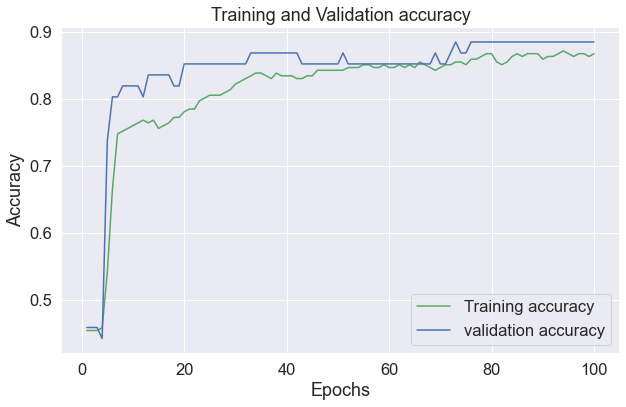

In [132]:
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.figure(figsize=(10,6))
epoch = range(1,len(train_acc)+1)
plt.plot(epoch, train_acc, 'g', label='Training accuracy')
plt.plot(epoch, val_acc , 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [123]:
import tensorflow as tf
mode = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=tf.nn.relu),
	keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

mode.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist=mode.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
8/8 [==============================] - 1s 20ms/step - loss: 0.6773 - accuracy: 0.6405 - val_loss: 0.6524 - val_accuracy: 0.7049
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 0.6562 - accuracy: 0.7025 - val_loss: 0.6266 - val_accuracy: 0.7213
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 0.6340 - accuracy: 0.7149 - val_loss: 0.5993 - val_accuracy: 0.7705
Epoch 4/200
8/8 [==============================] - 0s 5ms/step - loss: 0.6116 - accuracy: 0.7355 - val_loss: 0.5718 - val_accuracy: 0.7705
Epoch 5/200
8/8 [==============================] - 0s 6ms/step - loss: 0.5916 - accuracy: 0.7314 - val_loss: 0.5467 - val_accuracy: 0.7705
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 0.5705 - accuracy: 0.7355 - val_loss: 0.5210 - val_accuracy: 0.8033
Epoch 7/200
8/8 [==============================] - 0s 6ms/step - loss: 0.5495 - accuracy: 0.7562 - val_loss: 0.4907 - val_accuracy: 0.8689
Epoch 8/200
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.2586 - accuracy: 0.8884 - val_loss: 0.3689 - val_accuracy: 0.8361
Epoch 60/200
8/8 [==============================] - 0s 5ms/step - loss: 0.2576 - accuracy: 0.8884 - val_loss: 0.3690 - val_accuracy: 0.8525
Epoch 61/200
8/8 [==============================] - 0s 6ms/step - loss: 0.2622 - accuracy: 0.8926 - val_loss: 0.3726 - val_accuracy: 0.8033
Epoch 62/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2535 - accuracy: 0.9050 - val_loss: 0.3782 - val_accuracy: 0.8197
Epoch 63/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2508 - accuracy: 0.8926 - val_loss: 0.3683 - val_accuracy: 0.8033
Epoch 64/200
8/8 [==============================] - 0s 7ms/step - loss: 0.2564 - accuracy: 0.8926 - val_loss: 0.3801 - val_accuracy: 0.8033
Epoch 65/200
8/8 [==============================] - 0s 5ms/step - loss: 0.2486 - accuracy: 0.8926 - val_loss: 0.3891 - val_accuracy: 0.8361
Epoch 66/200
8/8 [===============

8/8 [==============================] - 0s 5ms/step - loss: 0.1549 - accuracy: 0.9504 - val_loss: 0.4837 - val_accuracy: 0.7541
Epoch 118/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1527 - accuracy: 0.9463 - val_loss: 0.4872 - val_accuracy: 0.7705
Epoch 119/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1528 - accuracy: 0.9504 - val_loss: 0.4855 - val_accuracy: 0.7541
Epoch 120/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1500 - accuracy: 0.9545 - val_loss: 0.4907 - val_accuracy: 0.7705
Epoch 121/200
8/8 [==============================] - 0s 6ms/step - loss: 0.1493 - accuracy: 0.9504 - val_loss: 0.4902 - val_accuracy: 0.7705
Epoch 122/200
8/8 [==============================] - 0s 8ms/step - loss: 0.1468 - accuracy: 0.9587 - val_loss: 0.4976 - val_accuracy: 0.7705
Epoch 123/200
8/8 [==============================] - 0s 7ms/step - loss: 0.1458 - accuracy: 0.9587 - val_loss: 0.4948 - val_accuracy: 0.7541
Epoch 124/200
8/8 [========

8/8 [==============================] - 0s 9ms/step - loss: 0.1019 - accuracy: 0.9628 - val_loss: 0.6494 - val_accuracy: 0.7377
Epoch 176/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0888 - accuracy: 0.9669 - val_loss: 0.6444 - val_accuracy: 0.7541
Epoch 177/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0884 - accuracy: 0.9669 - val_loss: 0.6463 - val_accuracy: 0.7541
Epoch 178/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0945 - accuracy: 0.9752 - val_loss: 0.6398 - val_accuracy: 0.7541
Epoch 179/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0877 - accuracy: 0.9752 - val_loss: 0.6587 - val_accuracy: 0.7541
Epoch 180/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0846 - accuracy: 0.9711 - val_loss: 0.6625 - val_accuracy: 0.7541
Epoch 181/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0848 - accuracy: 0.9669 - val_loss: 0.6752 - val_accuracy: 0.7541
Epoch 182/200
8/8 [=====

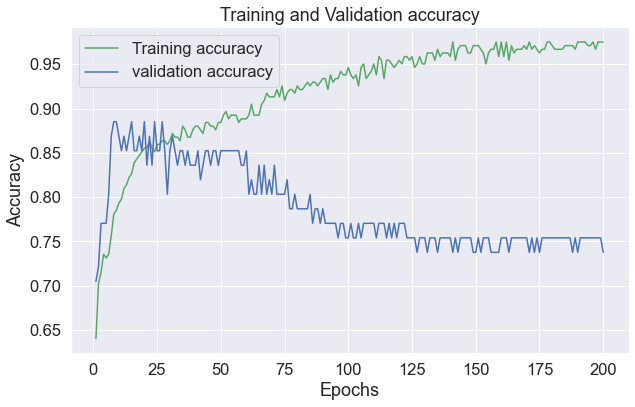

In [124]:
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.figure(figsize=(10,6))
epoch = range(1,len(train_acc)+1)
plt.plot(epoch, train_acc, 'g', label='Training accuracy')
plt.plot(epoch, val_acc , 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# All model best accuracy

In [152]:
model=['NN ','RFC','SVC','KNN','DTC','Lg ','GBC','GNB']
score=[NNs[1],RFs,SVCs,KNNs,DTs,LGs,GBs,GNBs]
ros=[]
for i in range(8):
    ros.append(np.round(score[i]*100,decimals=2))
    print(i+1,model[i]," : ",ros[i])

1 NN   :  88.52
2 RFC  :  88.52
3 SVC  :  88.52
4 KNN  :  88.52
5 DTC  :  88.52
6 Lg   :  86.89
7 GBC  :  85.25
8 GNB  :  85.25


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

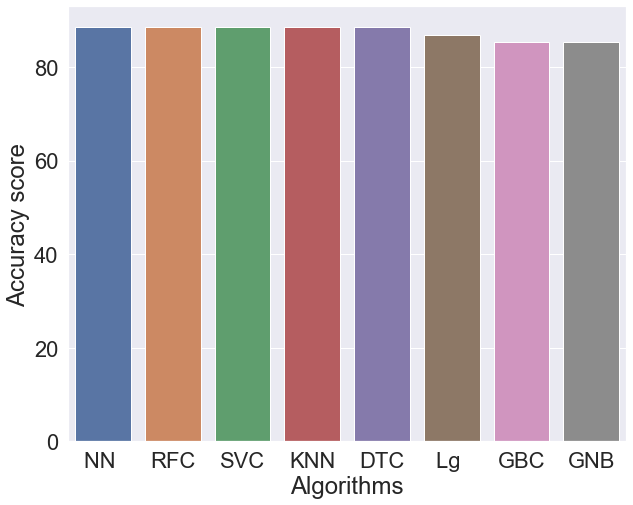

In [153]:
sns.set(font_scale=2)
plt.figure(figsize=(10,8))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(model,ros)